Enlaces a los datos:
<br>-"Elecciones GeneralesPadron-hasta-2018_0.csv": main voters census, divided by election type (presidential, congress, state or municipal level), polling place and age group.
https://bit.ly/3MKjSEX // 5911 entries | 1.10MB
<br>-"resultados-1996-2018-municipales-y-generales.csv": results by election type, polling place and age group.
https://bit.ly/3MreZjD // 390760 entries | 56.6MB

Archivos CSV, encoding=latin-1, separados por ";"


Datos del 2023:
<br>--Padrón electoral = 4.873.706 (Fuente: https://bit.ly/3Ir36ZN)
<br>--Nro de votos = 3.022.946 (Fuente: https://resultados.tsje.gov.py/publicacion/divulgacion.html)
<br>--Nro de votos en blanco = 68.242 (Fuente: https://resultados.tsje.gov.py/publicacion/divulgacion.html)



Version original entregada para el trabajo final del curso "Applied Plotting, Charting & Data Representation in Python", ofrecido por la Universidad de Michigan en Coursera.org.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_padron = pd.read_csv("Elecciones GeneralesPadron-hasta-2018_0.csv", sep=";", encoding="latin-1")
col_list = df_padron.columns.to_list()
# ['anio', 'dep', 'depdes', 'dis', 'disdes', 'zon', 'zondes', 'loc', 'locdes', 'cantmesas',
# 'men18fp', 'men18mp', 'men18fe', 'men18me', 'r18a24fp', 'r18a24mp', 'r18a24fe', 'r18a24me', 'r25a29fp',
# 'r25a29mp', 'r25a29fe', 'r25a29me', 'r30a34fp', 'r30a34mp', 'r30a34fe', 'r30a34me', 'r35a39fp', 'r35a39mp',
# 'r35a39fe', 'r35a39me', 'r40a44fp', 'r40a44mp', 'r40a44fe', 'r40a44me', 'r45a49fp', 'r45a49mp', 'r45a49fe',
# 'r45a49me', 'r50a54fp', 'r50a54mp', 'r50a54fe', 'r50a54me', 'r55a59fp', 'r55a59mp', 'r55a59fe', 'r55a59me',
# 'r60a64fp', 'r60a64mp', 'r60a64fe', 'r60a64me', 'may65fp', 'may65mp', 'may65fe', 'may65me']

# Desde la columna[10] en adelante, los datos consisten en numero de votantes por grupo de edad

df_padron.head(3)

,anio,dep,depdes,dis,disdes,zon,zondes,loc,locdes,cantmesas,...,r55a59fe,r55a59me,r60a64fp,r60a64mp,r60a64fe,r60a64me,may65fp,may65mp,may65fe,may65me
0,1998,0,CAPITAL,1,LA ENCARNACION,1,LA ENCARNACION,1,COL.EXPERIM. PARAGUAY BRASIL,14,...,0,0,52,61,0,0,142,131,0,0
1,1998,0,CAPITAL,1,LA ENCARNACION,1,LA ENCARNACION,2,ESC.DE COMERCIO N°3 RCA.PERU,22,...,0,0,110,93,0,0,238,215,0,0
2,1998,0,CAPITAL,1,LA ENCARNACION,1,LA ENCARNACION,3,COL.NAC. JUAN M. MALLORQUIN,14,...,0,0,62,44,0,0,129,114,0,0


In [5]:
df_results = pd.read_csv("resultados-1996-2018-municipales-y-generales.csv", sep=";", encoding="latin-1")
col_results = df_results.columns.to_list()
# ['año', 'tipo_eleccion', 'dep', 'depdes', 'dis', 'disdes', 'zon', 'zondes', 'loc', 'locdes',
# 'candidatura', 'cand_desc', 'lista', 'siglas_lista', 'nombre_lista',
# 'votos', 'nulos', 'blancos', 'total_votos']
## ---> Col[15]Votos por candidato (Col[14]"nombre_lista") // Col[16]Nulos // Col[17]Blanco // Col[18]total_votos

df_results.head(3)

,año,tipo_eleccion,dep,depdes,dis,disdes,zon,zondes,loc,locdes,candidatura,cand_desc,lista,siglas_lista,nombre_lista,votos,nulos,blancos,total_votos
0,1996,municipales,0,CAPITAL,0,ASUNCION,NaN,NaN,NaN,NaN,1,INTENDENTE,NaN,ANR,ASOCIACIÓN NACIONAL REPUBLICANA,105078,3638,2997,236033
1,1996,municipales,0,CAPITAL,0,ASUNCION,NaN,NaN,NaN,NaN,1,INTENDENTE,NaN,PRF,PARTIDO REVOLUCIONARIO FEBRERISTA,1997,3638,2997,236033
2,1996,municipales,0,CAPITAL,0,ASUNCION,NaN,NaN,NaN,NaN,1,INTENDENTE,NaN,PDC,PARTIDO DEMÓCRATA CRISTIANO,911,3638,2997,236033


In [8]:
def voters_calc(year):
    query = (df_padron.iloc[:,0]==year)
    return df_padron[query].iloc[:,10:].sum().sum()
    ## col[10] en adelante, cifra de votantes registrados

def votes_calc(year):
    query = (df_results.iloc[:,11]=="PRESIDENTE Y VICEPRESIDENTE DE LA RCA.") & (df_results["año"]==year)
    ## col[11] cand_desc == descripcion candidatura // Filtrar solo para Presidente y Vicepresidente (excluye año 2000)
    return df_results[query].iloc[:,-1].unique().sum()
    ## col[18]total_votos

def blanks_calc(year):
    query = (df_results.iloc[:,11]=="PRESIDENTE Y VICEPRESIDENTE DE LA RCA.") & (df_results["año"]==year)
    return df_results[query].iloc[:,-2].unique().sum()
    ## col[17]blancos


In [9]:
results_2023 = [4873706, 3022946, 68242]

years = [1998,  2003, 2008, 2013, 2018, 2023]
voters=[]
votes=[]
blanks=[]
for x in years:
    if not x == 2023:
        voters.append(voters_calc(x))
        votes.append(votes_calc(x))
        blanks.append(blanks_calc(x))
    else:
        voters.append(results_2023[0])
        votes.append(results_2023[1])
        blanks.append(results_2023[2])

print("Nro voters", list(zip(years, voters)))
print("Nro votes", list(zip(years, votes)))
print("Nro blanks", list(zip(years, blanks)))

## Calculate votes and blank votes percentage for a stacked bar
votes_perc = [votes[x]*100/voters[x] for x in range(len(voters))]
blanks_perc = [blanks[x]*100/votes[x] for x in range(len(voters))]

Nro voters [(1998, 2049449), (2003, 2405128), (2008, 2861940), (2013, 3516275), (2018, 4241507), (2023, 4873706)]
Nro votes [(1998, 1642448), (2003, 1420599), (2008, 1690641), (2013, 2255050), (2018, 2410438), (2023, 3022946)]
Nro blanks [(1998, 13600), (2003, 4155), (2008, 11460), (2013, 25622), (2018, 22083), (2023, 68242)]


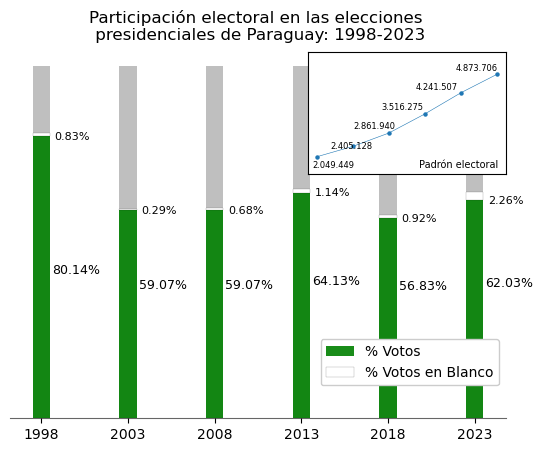

In [20]:
fig, ax = plt.subplots();

## Plotting the stacked bar
ax.set_xticks(years);
ax.set_yticks([]);
ax.bar(years, 100, color="black", alpha=0.25, width=1)
ax.bar(years, votes_perc, color="green", alpha=0.9, width=1, label="% Votos")
ax.bar(years, blanks_perc, color="w", bottom=votes_perc,
       linewidth=0.1, edgecolor="black", width=1, label="% Votos en Blanco");

ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);
ax.spines['bottom'].set_alpha(0.6);


## Plotting a line plot with voters census data
ax2 = plt.gca().inset_axes([0.6, 0.66, 0.4, 0.33])
ax2.plot(voters, "-o", ms=2.2, lw=0.4);
ax2.set_xticks([]);
ax2.set_yticks([]);
#plt.xlim(years[0]-1, years[-1]+1);
ax2.set_ylim(voters[0]-600000, voters[-1]+750000);
for i in range(len(voters)):
    ax2.annotate("{:,.0f}".format(voters[i]).replace("," , "."),
                 xy=(3.75+i*(10.5+i*2), 4.5+(i*14)), xycoords="axes points", size=6);
    
    ax.text(x=years[i]+2, y=25+(votes_perc[i]/5), s="{:.2%}".format(votes_perc[i]/100),
            ha="center", fontsize=9);
    ax.text(x=years[i]+1.8, y=votes_perc[i]-1, s="{:.2%}".format(blanks_perc[i]/100),
            ha="center", fontsize=8);
    
ax2.annotate("Padrón electoral", xy=(80,4.5), xycoords="axes points", size=7)

## setting a legend and title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc=4, bbox_to_anchor=(1, 0.07), framealpha=1);
plt.title("Participación electoral en las elecciones \n presidenciales de Paraguay: 1998-2023");
